In [6]:
import numpy
import scipy
import pymc
import sys

In [2]:
# Import relevant modules
import pymc
import numpy as np

# Some data
n = 5 * np.ones(4, dtype=int)
x = np.array([-.86, -.3, -.05, .73])

# Priors on unknown parameters
alpha = pymc.Normal('alpha', mu=0, tau=.01)
beta = pymc.Normal('beta', mu=0, tau=.01)

# Arbitrary deterministic function of parameters
@pymc.deterministic
def theta(a=alpha, b=beta):
    """theta = logit^{-1}(a+b)"""
    return pymc.invlogit(a + b * x)

# Binomial likelihood for data
d = pymc.Binomial('d', n=n, p=theta, value=np.array([0., 1., 3., 5.]),
                  observed=True)

In [10]:
scripts_dir = '/home/jovyan/work/'
sys.path.append(scripts_dir)

 [-----------------100%-----------------] 10000 of 10000 complete in 0.3 secPlotting alpha
Plotting theta_0
Plotting theta_1
Plotting theta_2
Plotting theta_3
Plotting beta


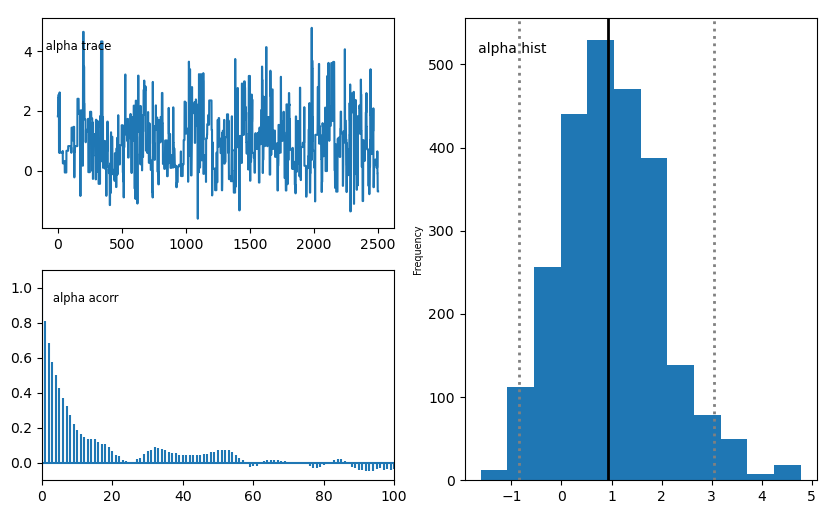

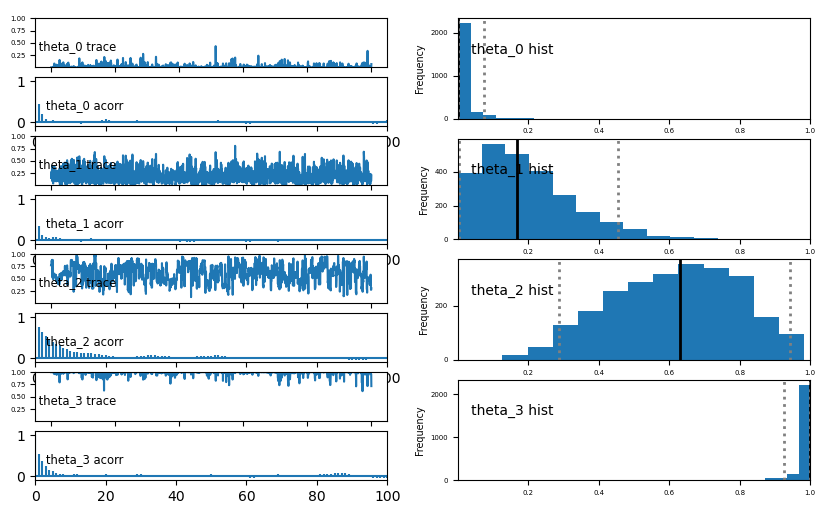

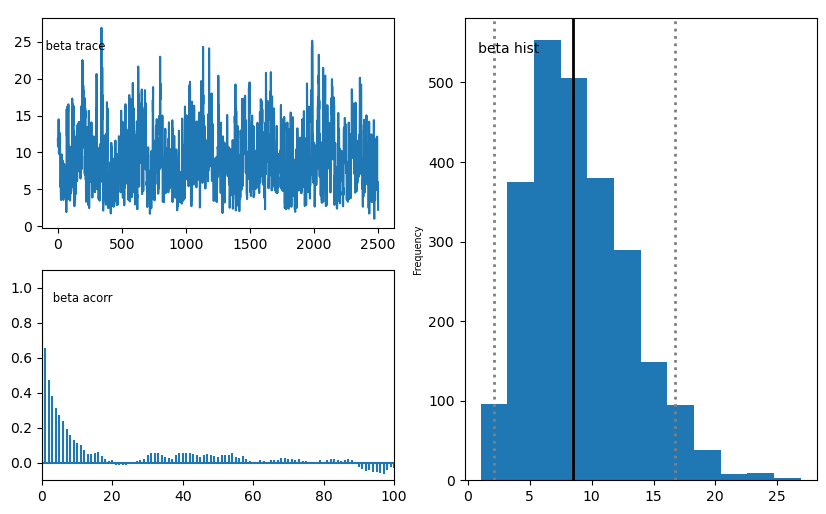

In [11]:
import mymodel

S = pymc.MCMC(mymodel, db='pickle')
S.sample(iter=10000, burn=5000, thin=2)
pymc.Matplot.plot(S)